In [256]:
#Import necessary libraries for data handling, preprocessing

import pandas as pd
import numpy as np
import re
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,GRU,Embedding,Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [295]:
!gdown 1d4VFxFxPqBpKoUuH51PQ8PYrFBmPCnH8

Downloading...
From: https://drive.google.com/uc?id=1d4VFxFxPqBpKoUuH51PQ8PYrFBmPCnH8
To: /content/spam_clean.csv
100% 484k/484k [00:00<00:00, 6.44MB/s]


In [296]:
# Load the dataset
df = pd.read_csv("spam_clean.csv",encoding = "latin1")

In [297]:
df.head()

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [298]:
#Convert text labels ('ham' & 'spam') into numerical labels (0 & 1)
df['type'] = df['type'].map({'ham': 0, 'spam': 1})

In [299]:
MAX_WORDS = 10000  # Vocabulary size
MAX_LEN = 100  # Max words per text


In [324]:
#Tokenize text data
tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token='<OOV>')
tokenizer.fit_on_texts(df['message'])

In [301]:
#text to seq
X = tokenizer.texts_to_sequences(df['message'])


# Pad sequences to ensure all inputs have the same length
X = pad_sequences(X, maxlen=MAX_LEN)

In [302]:
y = df['type'].values

In [303]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [304]:
#  Split data into training and testing sets (80% train, 20% test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [325]:
# Apply SMOTE to balance the training data (ONLY on training data)

smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [306]:
# Build the GRU-based model

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(MAX_WORDS, 128, input_length=MAX_LEN),
    tf.keras.layers.GRU(64, return_sequences=True),
    tf.keras.layers.GRU(32),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [307]:
# Compile the model with an appropriate optimizer and loss function

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['precision', 'recall', 'accuracy'])

In [308]:
# Train the model on the resampled training data and validate on test data

model.fit(X_train_resampled, y_train_resampled, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
242/242 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.8489 - loss: 0.3259 - precision: 0.8634 - recall: 0.8274 - val_accuracy: 0.9345 - val_loss: 0.1945 - val_precision: 0.6825 - val_recall: 0.9600
Epoch 2/5
242/242 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9815 - loss: 0.0549 - precision: 0.9880 - recall: 0.9752 - val_accuracy: 0.9507 - val_loss: 0.1639 - val_precision: 0.7436 - val_recall: 0.9667
Epoch 3/5
242/242 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9962 - loss: 0.0160 - precision: 0.9977 - recall: 0.9949 - val_accuracy: 0.9704 - val_loss: 0.1123 - val_precision: 0.8382 - val_recall: 0.9667
Epoch 4/5
242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9990 - loss: 0.0051 - precision: 0.9994 - recall: 0.9986 - val_accuracy: 0.9659 - val_loss: 0.1640 - val_precision: 0.8146 - val_recall: 0.9667
Epoch 5/5
242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9995 - loss: 0.0020 - precision: 0.9995 - recall: 0.9995 - val_accuracy: 0.9453 - val_loss: 0

In [309]:
loss, precision, recall, accuracy = model.evaluate(X_test, y_test)
print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, Accuracy: {accuracy:.4f}')

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9451 - loss: 0.2178 - precision: 0.6997 - recall: 0.9784
Precision: 0.7214, Recall: 0.9667, Accuracy: 0.9453


In [327]:
# Evaluate the model on the test set

model.evaluate(X_test, y_test)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9451 - loss: 0.2178 - precision: 0.6997 - recall: 0.9784


[0.2146439552307129,
 0.7213930487632751,
 0.9666666388511658,
 0.9452914595603943]

In [313]:
pred_probs = model.predict(X_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [318]:
y_pred = (pred_probs > 0.5).astype(int)

In [320]:
y_pred

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [321]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [322]:
# Compute the confusion matrix

cm = confusion_matrix(y_test,y_pred)

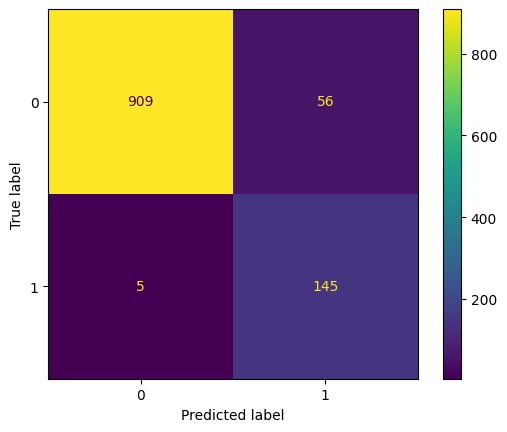

In [323]:
# Display the confusion matrix


ConfusionMatrixDisplay(cm).plot()

In [358]:
def predict_spam(text):
    seq = tokenizer.texts_to_sequences([text])
    padd_seq = pad_sequences(seq, maxlen=100, padding='post')
    pred = model.predict(padd_seq)[0][0]
    return "🔴 Spam" if pred > 0.5 else "🟢 Not Spam"

In [371]:
def predict_spam(text):
    seq = tokenizer.texts_to_sequences([text])
    padd_seq = pad_sequences(seq, maxlen=100, padding='post')
    pred = model.predict(padd_seq)[0][0]
    return "🔴 Spam" if pred > 0.5 else "🟢 Not Spam"

In [372]:
predict_spam('''
 Subject: Project Meeting Rescheduled
Hi Team,
Due to scheduling conflicts, our project meeting has been rescheduled to Wednesday at 3 PM.
Let me know if this works for everyone.''')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


'🟢 Not Spam'